In [2]:
import numpy.random as rd
import scipy.stats as st
import pylab
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [ ]:
https://online.stat.psu.edu/statprogram/reviews/statistical-concepts/chi-square-tests


# Z-Test

In [3]:
data = pd.read_csv('bloodpressure.csv')
data.shape

(120, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   patient    120 non-null    int64 
 1   sex        120 non-null    object
 2   agegrp     120 non-null    object
 3   bp_before  120 non-null    int64 
 4   bp_after   120 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 4.8+ KB


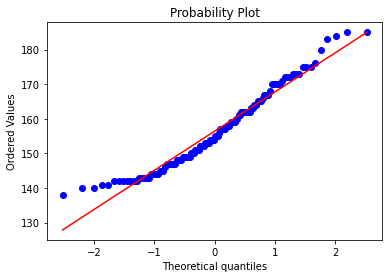

In [5]:
st.probplot(data['bp_before'],dist='norm',plot=pylab);

In [6]:
data.skew()

patient      0.000000
bp_before    0.554244
bp_after     0.393365
dtype: float64

In [7]:
from scipy.stats import boxcox as bxcx

In [8]:
x = bxcx(data['bp_before'])
x[0]

array([0.33448307, 0.33448311, 0.33448309, 0.33448309, 0.33448308,
       0.33448308, 0.33448308, 0.33448309, 0.33448309, 0.3344831 ,
       0.33448308, 0.33448312, 0.33448311, 0.33448307, 0.33448307,
       0.33448309, 0.33448306, 0.33448312, 0.33448307, 0.33448311,
       0.33448308, 0.3344831 , 0.33448309, 0.3344831 , 0.33448311,
       0.33448309, 0.33448309, 0.33448307, 0.33448311, 0.33448309,
       0.33448312, 0.33448313, 0.33448311, 0.33448308, 0.33448312,
       0.3344831 , 0.33448308, 0.33448306, 0.33448313, 0.3344831 ,
       0.3344831 , 0.3344831 , 0.33448311, 0.3344831 , 0.33448313,
       0.33448309, 0.33448312, 0.3344831 , 0.33448312, 0.33448312,
       0.33448312, 0.33448312, 0.33448312, 0.33448312, 0.33448312,
       0.33448311, 0.33448308, 0.33448309, 0.33448312, 0.33448311,
       0.33448309, 0.33448308, 0.33448307, 0.33448307, 0.3344831 ,
       0.33448308, 0.33448309, 0.33448309, 0.33448308, 0.33448305,
       0.33448311, 0.3344831 , 0.33448306, 0.33448311, 0.33448

In [9]:
x

(array([0.33448307, 0.33448311, 0.33448309, 0.33448309, 0.33448308,
        0.33448308, 0.33448308, 0.33448309, 0.33448309, 0.3344831 ,
        0.33448308, 0.33448312, 0.33448311, 0.33448307, 0.33448307,
        0.33448309, 0.33448306, 0.33448312, 0.33448307, 0.33448311,
        0.33448308, 0.3344831 , 0.33448309, 0.3344831 , 0.33448311,
        0.33448309, 0.33448309, 0.33448307, 0.33448311, 0.33448309,
        0.33448312, 0.33448313, 0.33448311, 0.33448308, 0.33448312,
        0.3344831 , 0.33448308, 0.33448306, 0.33448313, 0.3344831 ,
        0.3344831 , 0.3344831 , 0.33448311, 0.3344831 , 0.33448313,
        0.33448309, 0.33448312, 0.3344831 , 0.33448312, 0.33448312,
        0.33448312, 0.33448312, 0.33448312, 0.33448312, 0.33448312,
        0.33448311, 0.33448308, 0.33448309, 0.33448312, 0.33448311,
        0.33448309, 0.33448308, 0.33448307, 0.33448307, 0.3344831 ,
        0.33448308, 0.33448309, 0.33448309, 0.33448308, 0.33448305,
        0.33448311, 0.3344831 , 0.33448306, 0.33

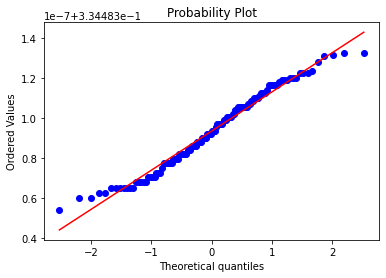

In [10]:
st.probplot(x[0],dist='norm',plot=pylab);

In [11]:
pd.Series(x[0]).skew()

0.0

In [12]:
pop_mean = x[0].mean()
pop_mean

0.33448309351523403

In [13]:
sample = x[0][:40]
sample

array([0.33448307, 0.33448311, 0.33448309, 0.33448309, 0.33448308,
       0.33448308, 0.33448308, 0.33448309, 0.33448309, 0.3344831 ,
       0.33448308, 0.33448312, 0.33448311, 0.33448307, 0.33448307,
       0.33448309, 0.33448306, 0.33448312, 0.33448307, 0.33448311,
       0.33448308, 0.3344831 , 0.33448309, 0.3344831 , 0.33448311,
       0.33448309, 0.33448309, 0.33448307, 0.33448311, 0.33448309,
       0.33448312, 0.33448313, 0.33448311, 0.33448308, 0.33448312,
       0.3344831 , 0.33448308, 0.33448306, 0.33448313, 0.3344831 ])

In [22]:
sample_mean = sample.mean()

In [23]:
sample_mean

0.3344830932421839

In [26]:
sample.std()

1.8795229697983968e-08

In [34]:
round(sample.std(),9)

1.9e-08

In [35]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [36]:
from statsmodels.stats.weightstats import ztest

In [20]:
help(ztest)

Help on function ztest in module statsmodels.stats.weightstats:

ztest(x1, x2=None, value=0, alternative='two-sided', usevar='pooled', ddof=1.0)
    test for mean based on normal distribution, one or two samples
    
    In the case of two samples, the samples are assumed to be independent.
    
    Parameters
    ----------
    x1 : array_like, 1-D or 2-D
        first of the two independent samples
    x2 : array_like, 1-D or 2-D
        second of the two independent samples
    value : float
        In the one sample case, value is the mean of x1 under the Null
        hypothesis.
        In the two sample case, value is the difference between mean of x1 and
        mean of x2 under the Null hypothesis. The test statistic is
        `x1_mean - x2_mean - value`.
    alternative : str
        The alternative hypothesis, H1, has to be one of the following
    
           'two-sided': H1: difference in means not equal to value (default)
           'larger' :   H1: difference in means la

# One - Sample Z test

In [21]:
zval,pval = ztest(sample,value=pop_mean,alternative = 'two-sided')
print(pval,zval)
if pval<0.05:
    print('reject null hypothesis')
else:
    print('accept null hypothesis')

0.9277110905694753 -0.09072501868926955
accept null hypothesis


In [22]:
neg_int = sample_mean - zval*(sample.std()/np.sqrt(40))

In [23]:
pos_int = sample_mean + zval*(sample.std()/np.sqrt(40))

In [24]:
ci  = neg_int,pos_int
ci

(0.3344830935117993, 0.3344830929725685)

# Two Sample Z Test

In [ ]:
ho : meanof before = meanof after
    meanof before - meanof after = 0
ha:
    meanof before - meanof after !=0

In [26]:
zval1,pval = ztest(s1,data['bp_after'][0:40],value = 10.5, alternative = 'two-sided')

NameError: name 's1' is not defined

# go to stats then inferential practicals for this

# One Sample T-Test

In [50]:
data = np.random.normal(loc=30,scale=8,size=100)
l = []
for i in data:
    l.append(int(round(i)))

In [51]:
data

array([27.86229933, 35.87274767, 31.4251196 , 42.9813167 , 23.92218618,
       46.97356774, 24.09420012, 42.59063181, 18.66204739, 32.87858287,
       35.20332847, 22.95080621, 15.81062673, 35.15593644, 21.14059668,
       32.02142275, 32.08976437, 30.98442912, 39.96730525, 36.87362686,
       31.97193863, 23.44591569, 13.52752172, 35.39167049, 31.52220354,
       27.3966641 , 34.65188299, 40.51132239, 24.4415354 , 33.62022546,
       31.46748452, 11.24773137, 30.78278211, 29.98298521, 24.94041426,
       31.39917092, 18.59021939, 34.2279803 , 35.00046091, 37.05580177,
       39.58887018, 23.24540015, 33.93118037, 41.17934457, 32.15094229,
       34.42393149, 30.91342393, 35.02679209, 44.12059441, 31.42294182,
       27.87594646, 27.33581798, 25.36300694, 31.14419728, 46.03240573,
       25.70282691, 15.55528813, 17.28985285, 39.48336272, 15.27980926,
       19.74321721, 21.35672626, 16.61318036, 36.21851   , 35.01925254,
       34.30844691, 12.17938921, 28.30805173, 32.72350867, 27.74

In [48]:
l

[32,
 23,
 26,
 35,
 29,
 33,
 10,
 37,
 30,
 31,
 29,
 40,
 21,
 16,
 36,
 36,
 39,
 35,
 46,
 29,
 22,
 20,
 25,
 32,
 21,
 43,
 32,
 25,
 31,
 33,
 26,
 42,
 21,
 26,
 23,
 26,
 32,
 22,
 31,
 30,
 17,
 34,
 9,
 17,
 23,
 40,
 23,
 29,
 19,
 17,
 42,
 45,
 12,
 35,
 26,
 38,
 27,
 29,
 28,
 25,
 28,
 34,
 15,
 33,
 47,
 12,
 10,
 25,
 23,
 22,
 37,
 23,
 25,
 23,
 37,
 29,
 42,
 30,
 40,
 36,
 35,
 11,
 25,
 23,
 34,
 26,
 33,
 20,
 30,
 42,
 29,
 34,
 32,
 33,
 29,
 29,
 30,
 25,
 24,
 18]

In [28]:
np.mean(l)

30.19

In [29]:
np.median(l)

30.0

In [62]:
l.mean()

29.86

In [30]:
len(l)

100

In [58]:
# Lets take sample
l = np.array(l)
sample_size = 10
age_sample = np.random.choice(l,sample_size)

In [59]:
age_sample

array([20, 40, 32, 31, 31, 44, 43, 33, 14, 31])

In [60]:
age_sample.mean()

31.9

In [61]:
from scipy.stats import ttest_1samp

In [63]:
ttest,p_value = ttest_1samp(age_sample,l.mean())

In [64]:
print(ttest,p_value)

0.6838522423553596 0.5112899096356555


In [65]:
if p_value < 0.05:
    print('we are rejecting null hypothesis')
else:
    print('we are accepting null hypothesis')

we are accepting null hypothesis


In [39]:
df = pd.read_csv('bloodpressure.csv')


In [40]:
df['bp_before'].mean()

156.45

In [41]:
df['bp_before'][10:20].mean()

154.9

In [42]:
df['bp_before'][10:20].std()

13.093255261138587

In [46]:
tval,pval = ttest_1samp(df['bp_before'][10:20],156)
print(tval)
print(pval)

-0.2656715504897832
0.7964776746455889


In [48]:
if pval > 0.05:
    print('accept null hypothesis')
else:
    print('reject null hypothesis')

accept null hypothesis


# 2 Sample T-test

In [50]:
import scipy.stats

In [51]:
ttest,pval = scipy.stats.ttest_rel(df['bp_before'],df['bp_after'])
print(pval)
if pval<0.05:
    print('reject null hypothesis')
else:
    print('accept null hypothesis')

0.0011297914644840823
reject null hypothesis


# chi square test